In [1]:
!pip install lightgbm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import lightgbm as lgm
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator
import time

import re


In [2]:

import pandas as pd
realty = pd.read_excel('AllAnnounces.xlsx', usecols = range(0, 160), index_col=None)
pd.set_option('max_columns', None)
realty.head()


,TypeOfProperty,NumAnnonce,Date,NumPieces,Unnamed: 4,SurfaceHabitable,Miseaprix,Adjudication,NumEtages,Etage,Terrasse,TerrasesSurface,Jardin,JardinSurface,Veranda,Piscine,Balcon,BalconSurface,d?barras,chemin?e,"Salles d'eau, salles de bains, douche","WC, toilette",Dressing,"Buanderie, s?choir",Cuisine,"Mansarde, grenier, comble",Mezzanine,"Rangement, placards",D?gagement,"Office, bureau",Atelier,Hall,"Chauffage, chaufferie","Cellier, cave, r?serve",Occupied,Loyer,LoyerSomme,Divise en logements,Mauvais etat,Copropri?t?,Unnamed: 40,tPlusNumPieces,Tplus,T5,T4,T3,T2,T1,Appartement,"Vigne, AOC",Non constructible,TerrainSurface,Bois,Edifie,"Terrain, bois","Annexe, Gardien, Dependences",Sous-sol,mitoyennet?,"Maison, pavillon",ParkingSouterrain,ParkingSurface,"Parking, stationnement","Garage, box",BureauSurface,Bureaux,CaveGrenierSurface,"D?barras, cave, grenier, r?serve","Restaurant, brasserie",H?tel,"Medical, dentaire, etc",Usage Mixte,CommerceSurface,Local ? usage de commerce,IndustrielSurface,"Entrep?t, hangar, local industriel",Immeuble r?sidentiel,Ensemble,ObjectAppAverage,ObjectAppMin,ObjectAppMax,ObjectAppConfidence,ObjectHouseAverage,ObjectHouseMin,ObjectHouseMax,ObjectHouseConfidence,Paris,Hauts-de-Seine,Seine-Saint-Denis,Val-de-Marne,Essonne,Yvelines,Val-d'Oise,Seine-et-Marne,Rhône-Alpes,"Alpes-de-Haute-Provence, Vaucluse, Hautes-Alpes",Alpes-Maritimes,Bouches-du-Rhône,Var,Aquitaine,Nord-Pas-de-Calais,Pays de la Loire,OtherRegions,CityAppAverage,CityAppMin,CityAppMax,CityAppConfidence,CityHouseAverage,CityHouseMin,CityHouseMax,CityHouseConfidence,CityOneYPriceChange,CityTwoYPriceChange,CityFiveYPriceChange,CityTenYPriceChange,CityDaysOfSaleAverage,Population,PopulationChande,MedianAge,PartOfPopLess25y,PartOfPopMore25y,Density(hab/km²),Area(km²),NumOfResidentialProp,PartOfPrinResProp,PartOfSecodaryResProp,VacantProp,HLM,PartOfProprietors,PartOfRentors,PartOfApp1room,PartOfApp2room,PartOfApp3room,PartOfApp4room,PartOfApp5andMoreRoom,MedianHouseholdAnnualIncome,ActivityRate,ActivityRateChange,Unemployment,UnemploymentChange,SubregionAppAverage,SubregionAppMin,SubregionAppMax,SubregionAppConfidence,SubregionHouseAverage,SubregionHouseMin,SubregionHouseMax,SubregionHouseConfidence,SubregionOneYPriceChange,SubregionTwoYPriceChange,SubregionFiveYPriceChange,SubregionTenYPriceChange,SubregionDaysOfSaleAverage,RegionAppAverage,RegionAppMin,RegionAppMax,RegionAppConfidence,RegionHouseAverage,RegionHouseMin,RegionHouseMax,RegionHouseConfidence
0,Appartement,65536,2017-03-23,10.0,2017,688.10,5.695000e+05,1.492090e+07,4.0,4.0,0,NaN,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,0.0,NaN,0.0,0,0,0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,NaN,0,2,0.0,0,NaN,0.0,0,0,0,0,0.0,0,0.0,0,0.0,0.0,11319.0,10052.0,14397.0,2.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10115,6607,16071,5,10841,6298,23545,1,8.6,13.9,28.9,57.6,48.0,2249975.0,3.1,37.0,27.9,72.1,21348.0,105.4,1356074.0,85.9,6.8,7.3,14.8,33.1,61.5,22.8,31.8,23.3,12.9,9.2,34025,76.8,1.3,11.6,0.2,10115,6607,16071,5,10841,6298,23545,1,8.6,13.9,28.9,57.6,48,6503,2006,15318,5,3388,1676,8837,3
1,Appartement,74876,2019-04-04,10.0,2019,688.10,5.000000e+05,1.280000e+07,4.0,4.0,0,NaN,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,0.0,NaN,0.0,0,0,0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,NaN,0,2,0.0,0,NaN,0.0,0,0,0,0,0.0,0,0.0,0,0.0,0.0,11319.0,10052.0,14397.0,2.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10115,6607,16071,5,10841,6298,23545,1,8.6,13.9,28.9,57.6,48.0,2249975.0,3.1,37.0,27.9,72.1,21348.0,105.4,1356074.0,85.9,6.8,7.3,14.8,33.1,61.5,22.8,31.8,23.3,12.9,9.2,34025,76.8,1.3,11.6,0.2,10115,6607,16071,5,10841,6298,23545,1,8.6,13.9,28.9,57.6,48,6503,2006,15318,5,3388,1676,8837,3
2,Appartement,74995,2019-03-21,9.0,2019,127.96,5.500000e+04,5.400000e+05,1.0,31.0,0,NaN,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,0.0,NaN,0.0,0,0,0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,NaN,0.0,0,0,0,0,

In [47]:
realty.info()
realty.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7879 entries, 0 to 7878
Columns: 160 entries, TypeOfProperty to RegionHouseConfidence
dtypes: datetime64[ns](1), float64(73), int64(73), object(13)
memory usage: 9.6+ MB


,NumAnnonce,NumPieces,Unnamed: 4,SurfaceHabitable,Miseaprix,Adjudication,NumEtages,Etage,Terrasse,TerrasesSurface,...,UnemploymentChange,SubregionAppConfidence,SubregionHouseConfidence,SubregionOneYPriceChange,SubregionTwoYPriceChange,SubregionFiveYPriceChange,SubregionTenYPriceChange,SubregionDaysOfSaleAverage,RegionAppConfidence,RegionHouseConfidence
count,7879.000000,3811.000000,7879.000000,5186.000000,7.879000e+03,7.879000e+03,6568.000000,5486.000000,7879.000000,82.000000,...,7850.000000,7879.0,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.0,7879.000000
mean,68449.761010,3.630543,2017.350425,83.413955,1.070681e+05,1.868087e+05,1.179050,1.775428,0.083132,35.757195,...,0.895745,5.0,3.927656,2.950654,5.142328,7.508707,14.724876,82.921437,5.0,4.108009
std,5012.705782,1.587997,1.079328,136.005831,4.941298e+05,6.065177e+05,0.690539,2.839984,0.287364,114.229403,...,1.923726,0.0,1.287980,2.602185,3.806715,8.112213,17.905346,21.871600,0.0,0.994213
min,59655.000000,1.000000,2016.000000,0.560000,0.000000e+00,1.034000e+00,0.000000,-1.000000,0.000000,3.160000,...,-11.800000,5.0,1.000000,-4.500000,-4.700000,-12.600000,-20.200000,48.000000,5.0,3.000000
25%,64084.500000,3.000000,2016.000000,39.952500,2.595000e+04,5.968391e+04,1.000000,0.000000,0.000000,8.062500,...,-0.300000,5.0,3.000000,0.900000,2.700000,2.200000,2.200000,64.000000,5.0,3.000000
50%,68411.000000,3.000000,2017.000000,63.720000,5.080000e+04,1.004400e+05,1.000000,1.000000,0.000000,12.600000,...,0.800000,5.0,5.000000,2.700000,4.500000,4.500000,7.900000,80.000000,5.0,5.000000
75%,72884.500000,4.000000,2018.000000,89.310000,9.464919e+04,1.795466e+05,1.000000,3.000000,0.000000,27.375000,...,1.800000,5.0,5.000000,4.300000,7.300000,13.000000,27.900000,95.000000,5.0,5.000000
max,77518.000000,17.000000,2019.000000,5500.000000,2.074129e+07,2.074129e+07,26.000000,40.000000,3.000000,1016.000000,...,18.000000,5.0,5.000000,8.600000,13.900000,28.900000,57.600000,189.000000,5.0,5.000000


In [48]:
realty = realty.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [49]:
realty.isnull().sum()

TypeOfProperty              0
NumAnnonce                  0
Date                        0
NumPieces                4068
Unnamed4                    0
                         ... 
RegionAppConfidence         0
RegionHouseAverage          0
RegionHouseMin              0
RegionHouseMax              0
RegionHouseConfidence       0
Length: 160, dtype: int64

In [50]:
realty['Adjudication'].isnull().sum()

0

In [51]:
realty = realty.rename(columns = {'Unnamed4': 'Year'})
realty

,TypeOfProperty,NumAnnonce,Date,NumPieces,Year,SurfaceHabitable,Miseaprix,Adjudication,NumEtages,Etage,...,SubregionTenYPriceChange,SubregionDaysOfSaleAverage,RegionAppAverage,RegionAppMin,RegionAppMax,RegionAppConfidence,RegionHouseAverage,RegionHouseMin,RegionHouseMax,RegionHouseConfidence
0,Appartement,65536,2017-03-23,10.0,2017,688.10,5.695000e+05,1.492090e+07,4.0,4.0,...,57.6,48,6503,2006,15318,5,3388,1676,8837,3
1,Appartement,74876,2019-04-04,10.0,2019,688.10,5.000000e+05,1.280000e+07,4.0,4.0,...,57.6,48,6503,2006,15318,5,3388,1676,8837,3
2,Appartement,74995,2019-03-21,9.0,2019,127.96,5.500000e+04,5.400000e+05,1.0,31.0,...,57.6,48,6503,2006,15318,5,3388,1676,8837,3
3,Appartement,61495,2016-05-12,8.0,2016,240.00,1.787983e+06,2.710813e+06,1.0,5.0,...,57.6,48,6503,2006,15318,5,3388,1676,8837,3
4,Appartement,62445,2016-06-30,7.0,2016,196.00,6.921224e+04,1.787983e+06,1.0,4.0,...,57.6,48,6503,2006,15318,5,3388,1676,8837,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7874,"Terrain, bois",76368,2019-07-02,NaN,2019,NaN,3.463200e+05,7.400000e+05,0.0,NaN,...,27.9,62,6503,2006,15318,5,3388,1676,8837,3
7875,"Terrain, bois",71248,2018-06-05,NaN,2018,NaN,5.687000e+04,1.447600e+05,0.0,NaN,...,7.9,79,6503,2006,15318,5,3388,1676,8837,3
7876,"Terrain, bois",62171,2016-06-29,NaN,2016,NaN,5.475991e+04,9.298852e+04,0.0,NaN,...,6.2,82,6503,2006,15318,5,3388,1676,8837,3
7877,"Terrain, bois",66970,2017-06-14,NaN,2017,NaN,9.288000e+04,1.548000e+05,0.0,NaN,...,16.4,80,6503,2006,15318,5,3388,1676,8837,3


In [52]:
#здесь найдем и посчитаем пропуски в столбцах, оценим сами данные
for row in realty:
    print(realty[row].value_counts())

Appartement                           3883
Maison, pavillon                      1940
T1                                     782
Local à usage de commerce              292
Terrain, bois                          256
Parking, garage                        209
Immeuble résidentiel                   193
Ensemble                                98
Débarras, cave, grenier, réserve        88
Entrepôt, hangar, local induT1riel      86
Bureaux                                 52
Name: TypeOfProperty, dtype: int64
62349    16
76933    14
68238    11
72890     9
73999     9
         ..
62035     1
72278     1
66141     1
72286     1
65536     1
Name: NumAnnonce, Length: 7465, dtype: int64
2016-09-08    58
2019-09-12    57
2016-06-23    53
2016-01-28    51
2019-05-16    50
              ..
2019-05-13     1
2018-03-07     1
2016-04-18     1
2019-05-17     1
2016-09-26     1
Name: Date, Length: 632, dtype: int64
3.0     1138
2.0      941
4.0      917
5.0      416
6.0      186
7.0      103
8.0       43

In [53]:
realty.duplicated().sum()

14

In [54]:
realty = realty.drop_duplicates()

In [ ]:
for a in ['Power','Kilometer','Price']:
    sns.boxplot(realty[a]) 
    plt.show()

In [56]:
realty.fillna(realty.mean(), inplace=True)

In [57]:
realty.tail()

,TypeOfProperty,NumAnnonce,Date,NumPieces,Year,SurfaceHabitable,Miseaprix,Adjudication,NumEtages,Etage,...,SubregionTenYPriceChange,SubregionDaysOfSaleAverage,RegionAppAverage,RegionAppMin,RegionAppMax,RegionAppConfidence,RegionHouseAverage,RegionHouseMin,RegionHouseMax,RegionHouseConfidence
7874,"Terrain, bois",76368,2019-07-02,3.630709,2019,83.459383,346320.000000,740000.000000,0.0,1.777332,...,27.9,62,6503,2006,15318,5,3388,1676,8837,3
7875,"Terrain, bois",71248,2018-06-05,3.630709,2018,83.459383,56870.000000,144760.000000,0.0,1.777332,...,7.9,79,6503,2006,15318,5,3388,1676,8837,3
7876,"Terrain, bois",62171,2016-06-29,3.630709,2016,83.459383,54759.907128,92988.521538,0.0,1.777332,...,6.2,82,6503,2006,15318,5,3388,1676,8837,3
7877,"Terrain, bois",66970,2017-06-14,3.630709,2017,83.459383,92880.000000,154800.000000,0.0,1.777332,...,16.4,80,6503,2006,15318,5,3388,1676,8837,3
7878,"Terrain, bois",74117,2019-01-23,3.630709,2019,83.459383,50000.000000,96000.000000,0.0,1.777332,...,2.2,116,3212,2409,4819,5,3367,2525,5050,5


In [58]:
realty.drop(['NumAnnonce',], axis='columns', inplace=True)

In [59]:
realty['TypeOfProperty'] = pd.to_numeric(realty['TypeOfProperty'], errors = 'coerce')
realty['Date'] = pd.to_numeric(realty['Date'], errors = 'coerce')
realty['SubregionAppAverage'] = pd.to_numeric(realty['SubregionAppAverage'], errors = 'coerce')
realty['SubregionAppMin'] = pd.to_numeric(realty['SubregionAppMin'], errors = 'coerce')
realty['SubregionAppMax'] = pd.to_numeric(realty['SubregionAppMax'], errors = 'coerce')
realty['SubregionHouseAverage'] = pd.to_numeric(realty['SubregionHouseAverage'], errors = 'coerce')
realty['SubregionHouseMin'] = pd.to_numeric(realty['SubregionHouseMin'], errors = 'coerce')
realty['SubregionHouseMax'] = pd.to_numeric(realty['SubregionHouseMax'], errors = 'coerce')
realty['RegionAppAverage'] = pd.to_numeric(realty['RegionAppAverage'], errors = 'coerce')
realty['RegionAppMin'] = pd.to_numeric(realty['RegionAppMin'], errors = 'coerce')
realty['RegionAppMax'] = pd.to_numeric(realty['RegionAppMax'], errors = 'coerce')
realty['RegionHouseAverage'] = pd.to_numeric(realty['RegionHouseAverage'], errors = 'coerce')
realty['RegionHouseMin'] = pd.to_numeric(realty['RegionHouseMin'], errors = 'coerce')
realty['RegionHouseMax'] = pd.to_numeric(realty['RegionHouseMax'], errors = 'coerce')



Разделим датасет

In [39]:
train_val, test = train_test_split(realty, shuffle=False, test_size=0.1)
train, valid = train_test_split(train_val, shuffle=False, test_size=0.25)

train_features = train.drop(['Adjudication', 'NumPieces'], axis=1)
train_target = train['Adjudication']

valid_features = valid.drop(['Adjudication', 'NumPieces'], axis=1)
valid_target = valid['Adjudication']

test_features = test.drop(['Adjudication' 'NumPieces'], axis=1)
test_target = test['Adjudication']

In [16]:
print(train.shape, valid.shape, test.shape)

(5308, 162) (1770, 162) (787, 162)


In [17]:
%%time
estim_new = lgb.LGBMRegressor(num_leaves= 11,learning_rate=0.01)


param_grid = {
    'n_estimators': [50,100,200,300],
    'max_depth': [5,10,15,20]
   
}

cv =KFold(random_state=1, n_splits=7)
gbm = GridSearchCV(estim_new, param_grid, cv=cv, scoring='neg_mean_squared_error')

gbm.fit(train_features, train_target)

print('Best parameters is:', gbm.best_params_)
print('Best score is:', gbm.best_score_)

Best parameters is: {'max_depth': 10, 'n_estimators': 200}
Best score is: -173332638397.86472
Wall time: 2min 7s


In [18]:
light_gbm = lgb.LGBMRegressor(num_leaves= 11, learning_rate=0.01, max_depth=10, n_estimators=200)
light_gbm.fit(train_features, train_target)
pred_lgb = light_gbm.predict(valid_features)
rmse_lgb = mean_squared_error(valid_target, pred_lgb)**0.5
rmse_lgb

789241.2978052384

In [26]:
pred_lgb_test = light_gbm.predict(test_features)
rmse_lgb_test = mean_squared_error(test_target, pred_lgb_test)**0.5
rmse_lgb_test

108070.6487903482

In [19]:
%%time
model_cat = CatBoostRegressor(n_estimators = 300, loss_function = 'MAE', eval_metric = 'RMSE', random_state=None)
model_cat.fit(train_features, train_target, verbose=10)
predicted_valid2 = model_cat.predict(valid_features)
rmse_cat = (mean_squared_error(valid_target, predicted_valid2))**0.5
rmse_cat

0:	learn: 488044.8739981	total: 79ms	remaining: 23.6s
10:	learn: 479485.9997701	total: 467ms	remaining: 12.3s
20:	learn: 470038.1651125	total: 783ms	remaining: 10.4s
30:	learn: 464203.8704619	total: 1.09s	remaining: 9.47s
40:	learn: 456374.5323920	total: 1.31s	remaining: 8.28s
50:	learn: 449148.0462338	total: 1.56s	remaining: 7.63s
60:	learn: 438221.3664174	total: 1.89s	remaining: 7.42s
70:	learn: 427951.3173326	total: 2.23s	remaining: 7.21s
80:	learn: 422144.9397085	total: 2.5s	remaining: 6.75s
90:	learn: 417536.6002329	total: 2.7s	remaining: 6.2s
100:	learn: 414556.7258500	total: 2.92s	remaining: 5.76s
110:	learn: 409643.4988882	total: 3.14s	remaining: 5.34s
120:	learn: 404580.9400766	total: 3.35s	remaining: 4.96s
130:	learn: 401906.7661583	total: 3.57s	remaining: 4.61s
140:	learn: 400137.2972734	total: 3.79s	remaining: 4.27s
150:	learn: 398342.7107986	total: 4s	remaining: 3.95s
160:	learn: 394970.1133544	total: 4.21s	remaining: 3.64s
170:	learn: 393336.5025135	total: 4.43s	remaining

835673.888866245

In [20]:
predicted_valid3 = model_cat.predict(test_features)
rmse_cat_test = mean_squared_error(test_target, predicted_valid3)**0.5
rmse_cat_test

79719.20269967038

Проведем анализ важности факторов и выведем график:

In [21]:
light_gbm.feature_importances_

array([  0,   0,  77,  48, 278, 605,  76,   1,   0,   0,   0,   0,   0,
         0,  11,   0,   0,   0,   6,   5,   0,   0,  35,   0,   0,   0,
         0,  15,   0,   0,   0,   7,   0,   0,   0,   0,   0,   0,   0,
        10,  14,   0,   0,   0,   0,  15,  29,   0,   0,  29,   0,   0,
         5,   0,   0,   0,   1,   0,   8,   0,  11,   3,   0,   7,   9,
         0,   0,   0,   0,   1,   7,  31,   0,  12,   5, 111,  47,  42,
         7,  10,  19,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  27,  74,   1,   0,
         6,   0,   0,   0,   0,  14,   1,   8,   4,   0,   3,   0,   0,
        12,  50,  56,   3,   2,   0,   6,  11,   7,  19,   1,  38,   6,
        15,  22,  12,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0])

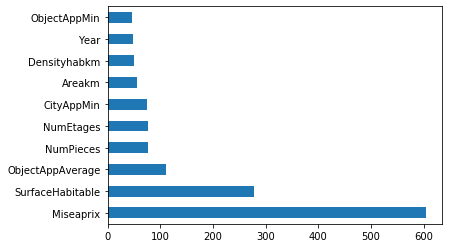

In [24]:
feat_importances = pd.Series(light_gbm.feature_importances_, index=train_features.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [27]:
model_cat.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 2.52080575e+00, 8.03759617e-01,
       4.37574063e+00, 3.22477816e+01, 2.36238032e+00, 8.33894975e-01,
       9.46886381e-02, 8.92968914e-04, 1.20080038e-02, 3.02646569e-06,
       7.43628177e-03, 0.00000000e+00, 1.64708376e-01, 1.37665128e-03,
       3.85966723e-04, 2.01599487e-03, 2.89596874e-01, 1.29212841e+00,
       4.62212321e-06, 0.00000000e+00, 4.44067331e-01, 2.01176301e-03,
       0.00000000e+00, 1.19817322e-02, 3.79713208e-01, 1.53032482e-01,
       2.74636944e-02, 6.95388722e-02, 2.33807614e-03, 1.93106618e-01,
       5.19404602e-02, 2.47911670e-04, 1.61069407e-03, 6.52154119e-03,
       0.00000000e+00, 0.00000000e+00, 1.14917029e-03, 1.52082428e+00,
       2.30098843e+00, 2.21449549e-02, 1.35653985e-01, 1.23259607e-01,
       4.35808204e-02, 2.29329268e-01, 2.93084407e+00, 0.00000000e+00,
       0.00000000e+00, 2.15131421e-01, 0.00000000e+00, 2.67560051e-06,
       2.71520125e-03, 0.00000000e+00, 4.88924815e-03, 0.00000000e+00,
      

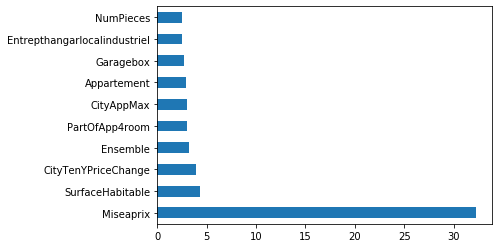

In [28]:
feat_importances = pd.Series(model_cat.feature_importances_, index=train_features.columns)
feat_importances.nlargest(10).plot(kind='barh')